In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data set from csv file USA_Admit

In [ ]:
df = pd.read_csv('USA_Admit.csv')

In this project, we will be predicting Chance of Admit of a student based on different parameters available of his/her profile.

In [ ]:
print(f'Columns in our admits dataframe are:')
df.columns

Columns in our admits dataframe are:


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


#**Data Cleaning and Preparation**

In [ ]:
#Removing the column Serial No as it not relevant in our analysis and renaming certain columns

df.drop(['Serial No.'] , axis='columns' , inplace=True)

df.rename(columns={'GRE Score' : 'GRE', 'TOEFL Score' : 'TOEFL', 'Chance of Admit' : 'ChanceofAdmit'} , inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Cleaning our data by dropping NA values
df=df.replace(' ',np.nan)
df = df.replace(r'^\s*$', np.NaN, regex=True)
df=df.dropna()

#Seeing the data again
df

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.dtypes

GRE                    int64
TOEFL                  int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                400 non-null    int64  
 1   TOEFL              400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [ ]:
#Seeing general statistics of our dataframe 
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Observations:
1. From df.**desribe**(), we can see maximum chance of admit is 0.97, there is no 10 CGPA.
2. From df.dtype and df.info(), we can see there are no null values in the dataset.

# **Data Correlation**

We continue to find the correlation between different columns.


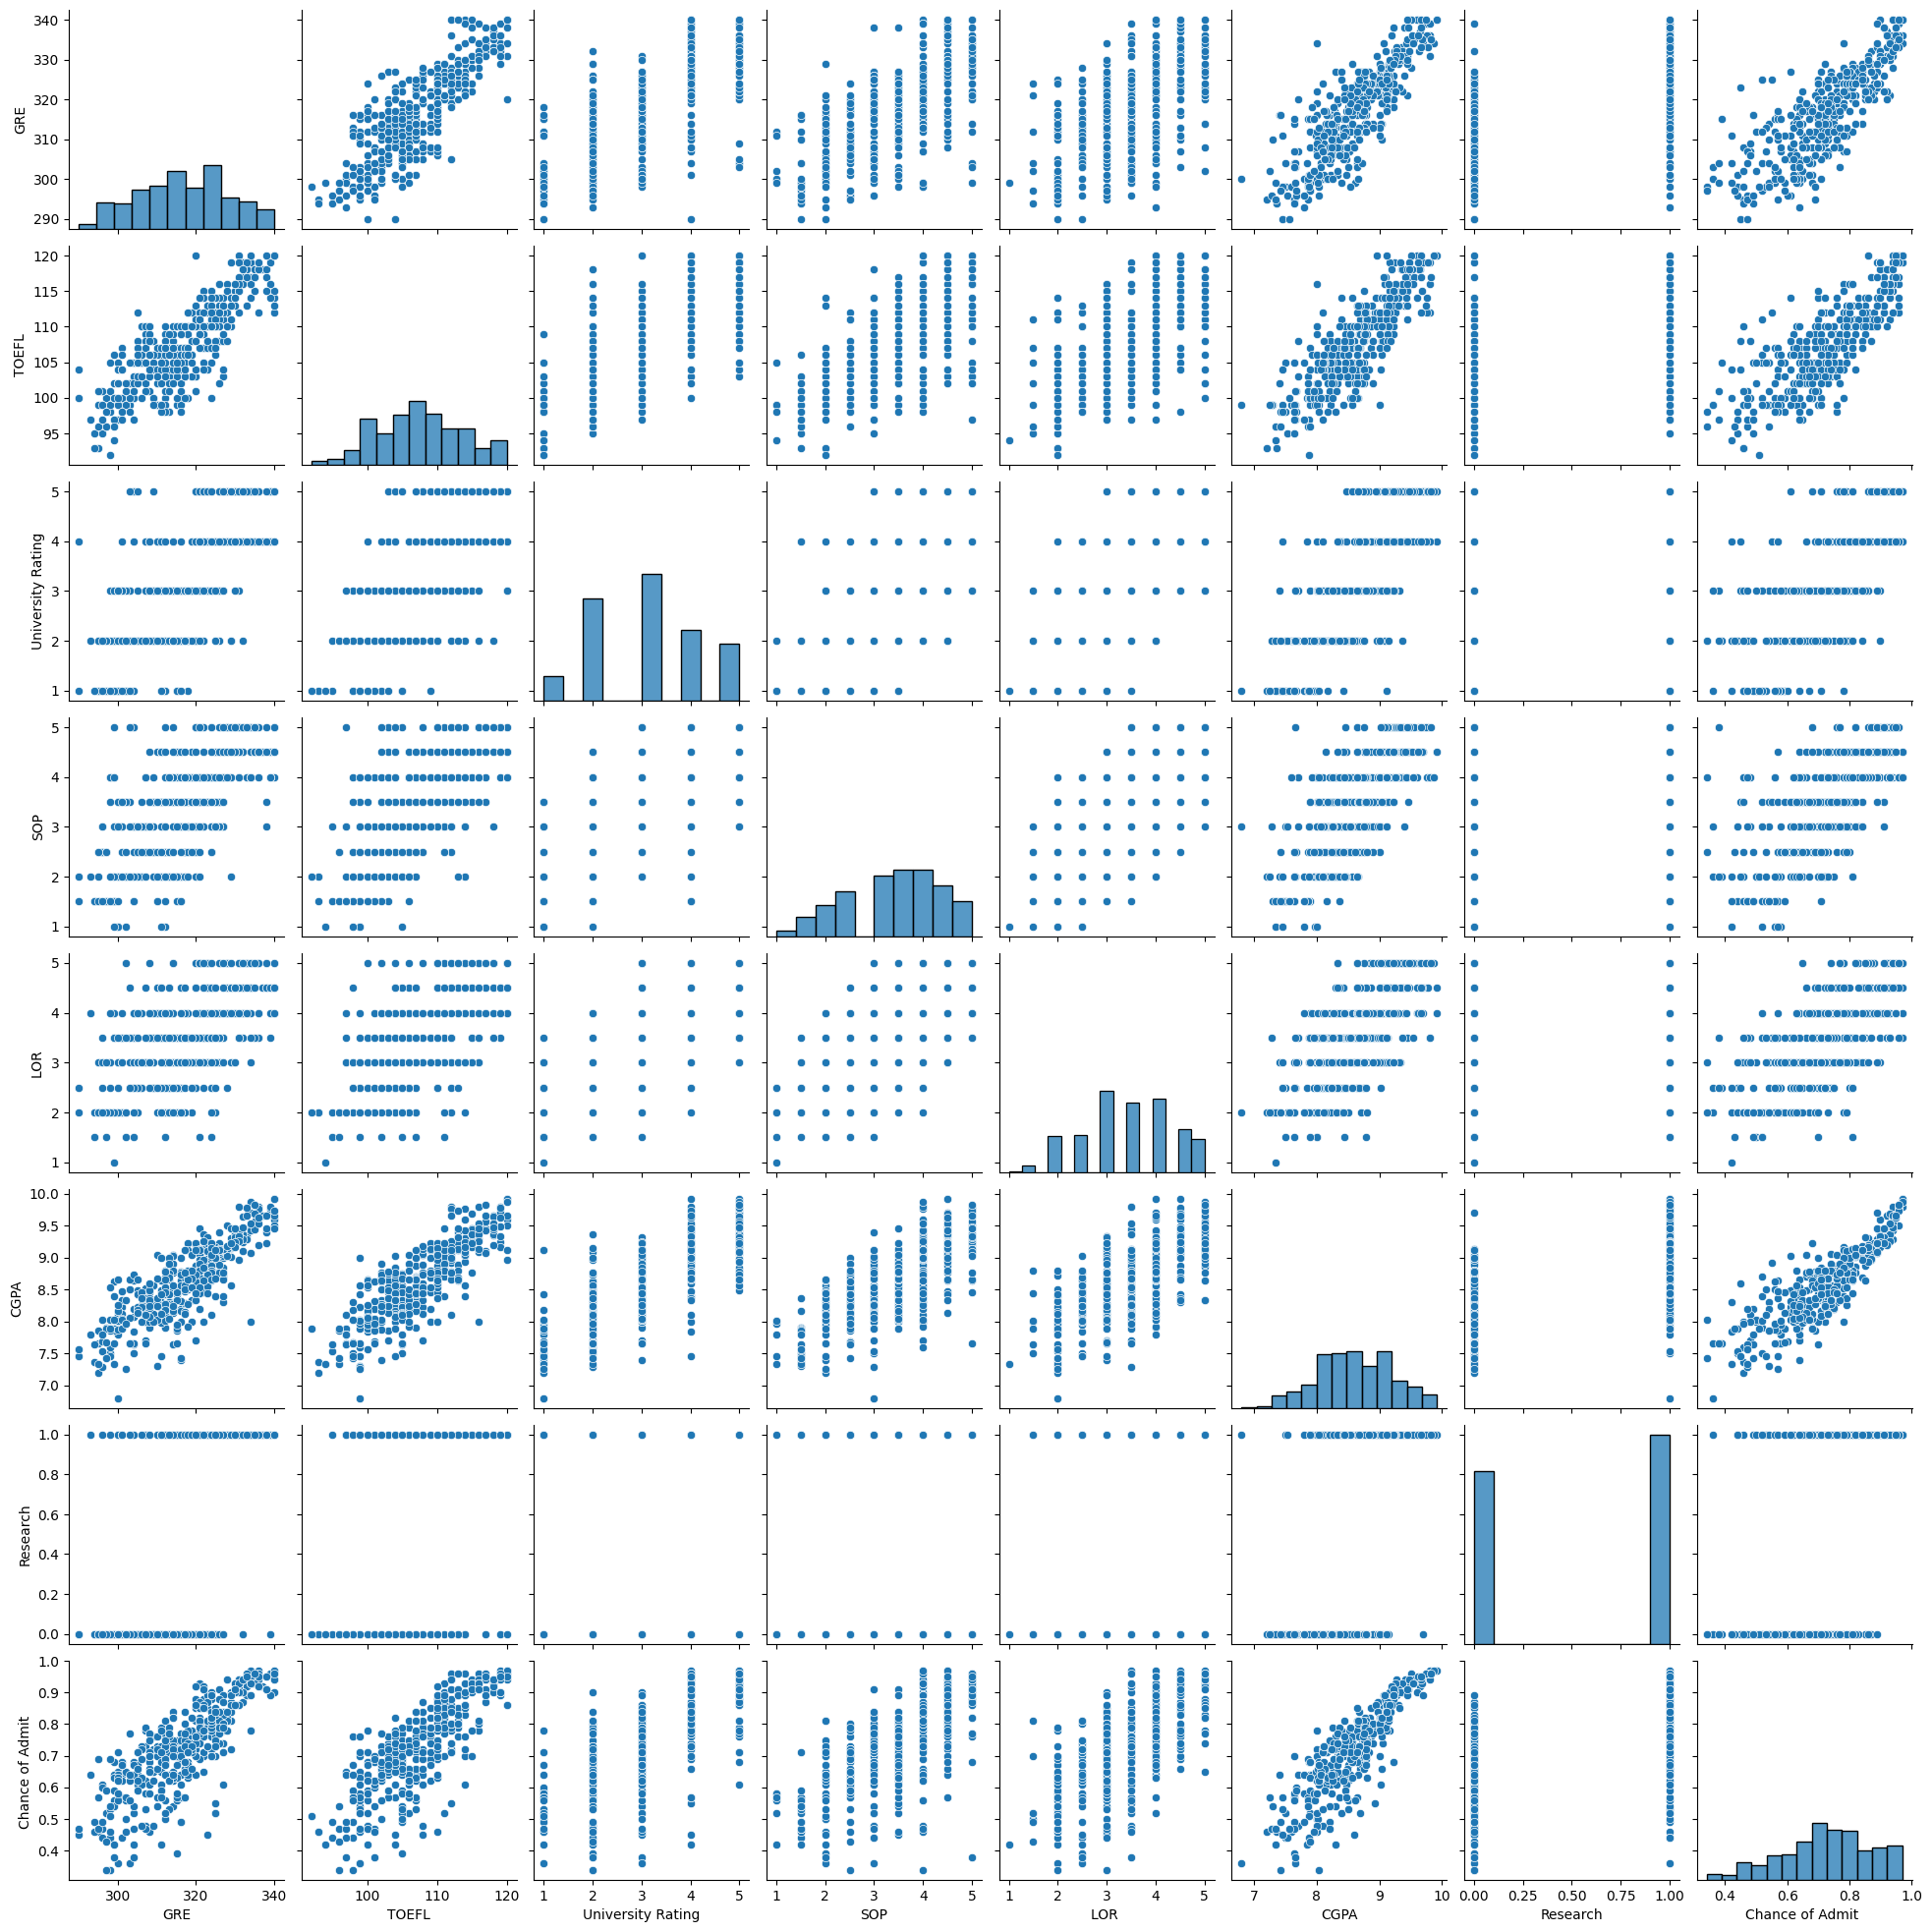

In [ ]:
#Using pariplot from Seaborn package
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation factors- Heat Map')

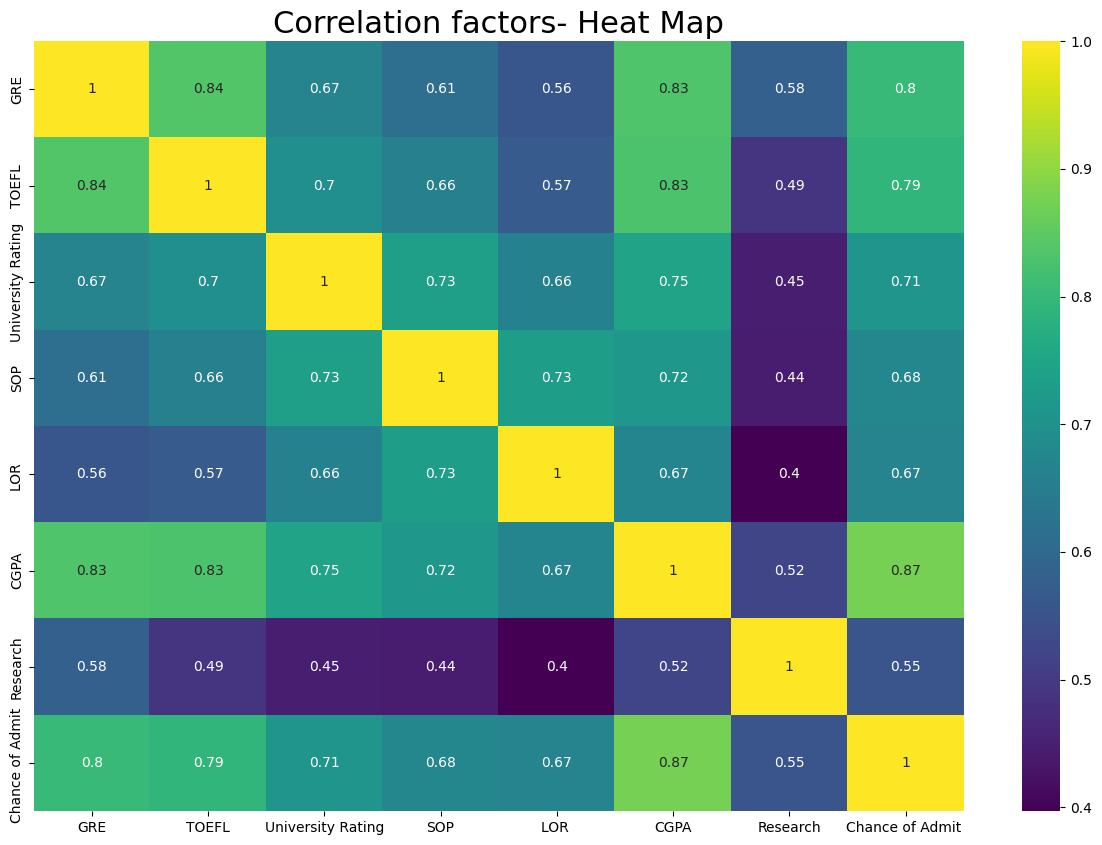

In [ ]:
#Using matplot library
plt.figure(figsize=(15,10))

#Making heatmap and using color palette Viridis from seaborn package library
sns.heatmap(df.corr(), annot=True, cmap='viridis').set_title('Correlation factors- Heat Map', color='black', size='22')

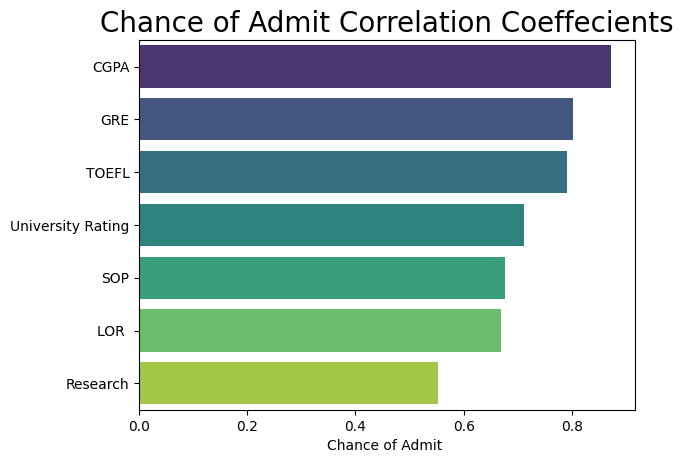

In [ ]:
COA_corr = pd.DataFrame(df.corr()['Chance of Admit '])
COA_corr.drop('Chance of Admit ', inplace=True)
COA_corr.sort_values(['Chance of Admit '], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Chance of Admit ']
sns.barplot(x=COA_corr_y,y=COA_corr_x, palette='viridis').set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

From above plot, we can see that the factors CGPA, GRE and TOEFL correlate the most to Chance of Admit



---



# Exploring the top 3 factors (CGPA, GRE, TOEFL) to get a more accurate analysis


**I. CGPA vs Chance of Admit**

Cumulative Grade Point Average is a score of a student's academic performance in their institution. Of all the factors, CGPA has correlated best to our output parameter, Chance of Admit.

In this dataset, CGPA is taken on a 10 point grading scale


Lowest CGPA is 6.8
Average CGPA is 8.598924999999998
Highest CGPA is 9.92


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

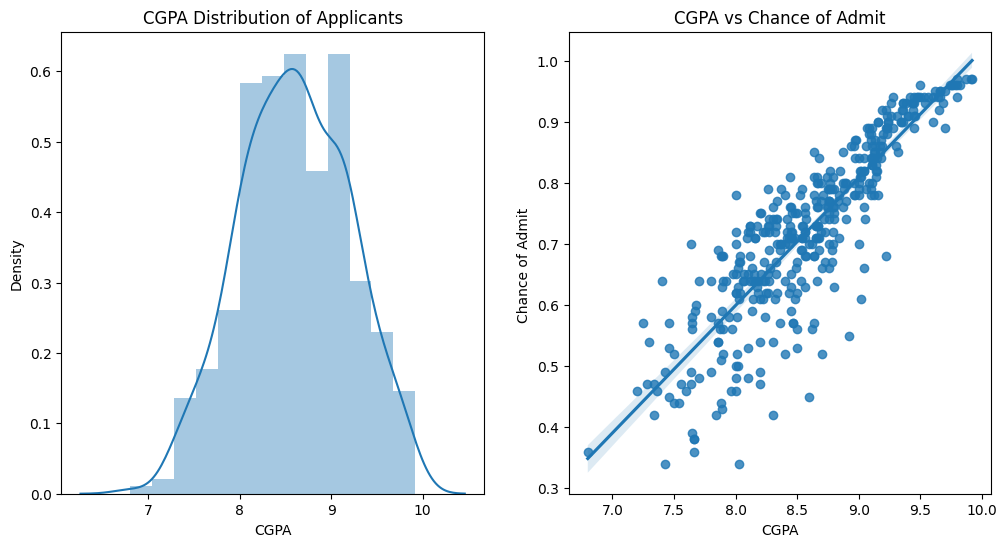

In [ ]:
print(f"Lowest CGPA is {df['CGPA'].min()}")
print(f"Average CGPA is {df['CGPA'].mean()}")
print(f"Highest CGPA is {df['CGPA'].max()}")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit '])
plt.title('CGPA vs Chance of Admit')

From the above plot, it is evident that:
1. Average CGPA is 8.6 and maximum CGPA is 9.92
2. Student should have a CGPA of at least 7.6 to have 50% Chance of Admit
3. Students with CGPA>8.6 would stand out and their Chance of Admit will be increased to 80%


**II. GRE vs Chance of Admit**

The Graduate Record Examination is required for admission to graduate programs globally. 
GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA. 

In this dataset, the GRE Score is based on a maximum of 340 points.



Lowest GRE Score is 290
Average GRE Score is 316.8075
Highest GRE Score is 340


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

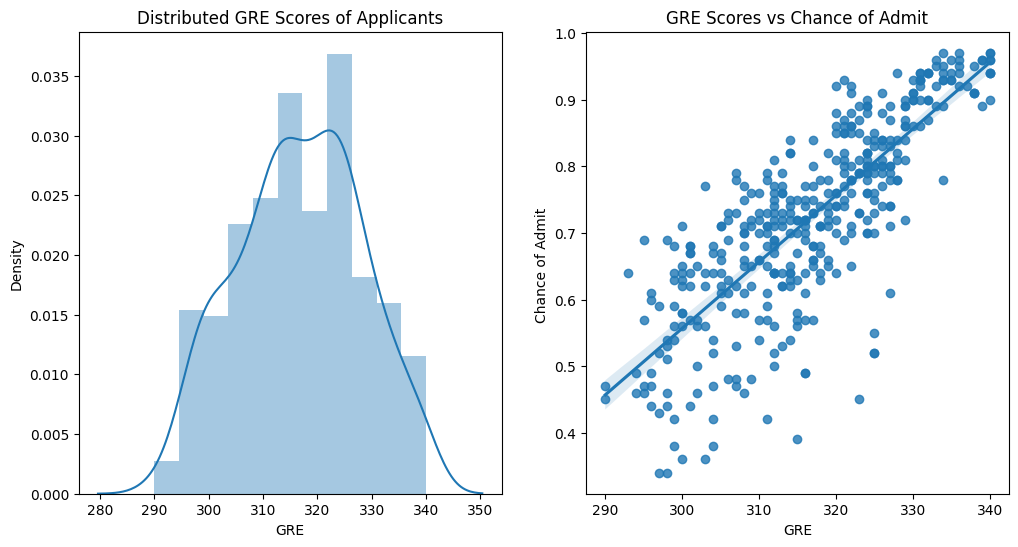

In [ ]:
print(f"Lowest GRE Score is {df['GRE'].min()}")
print(f"Average GRE Score is {df['GRE'].mean()}")
print(f"Highest GRE Score is {df['GRE'].max()}")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE'], df['Chance of Admit '])
plt.title('GRE Scores vs Chance of Admit')

From the above plot, it is evident that:
1. Average GRE Score is 316.8075 and highest GRE Score is 340
2. Student's GRE score should at least be 295 to have Chance Of Admit as 50%
3. Students with GRE>317 would stand out and their Chance of Admit will be increased to 70%

**III. TOEFL vs Chance of Admit**

TOEFL (Test Of English as a Foreign Language) scores required for non-native international students. Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.
In this dataset, the TOEFL scores are based on a maximum of 120.




Lowest TOEFL Score is 92
Average TOEFL Score is 107.41
Highest TOEFL Score is 120


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

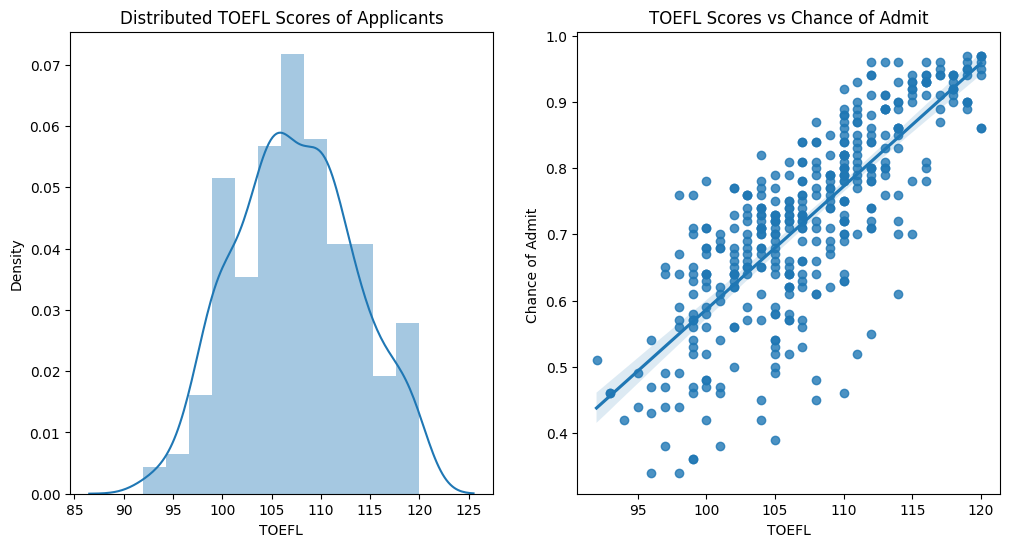

In [ ]:
print(f"Lowest TOEFL Score is {df['TOEFL'].min()}")
print(f"Average TOEFL Score is {df['TOEFL'].mean()}")
print(f"Highest TOEFL Score is {df['TOEFL'].max()}")
      
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL'], df['Chance of Admit '])
plt.title('TOEFL Scores vs Chance of Admit')

From the above plot it is evident that:
1. Average TOEFL Score is 107.41 and highest TOEFL Score is 120
2. Student's TOEFL score should at least be 95 to have Chance Of Admit as 50%
3. Students with TOEFL>107 would stand out and their Chance of Admit will be increased to 70%



*Exploring our other parameters and how they affect Chance of Admit.*


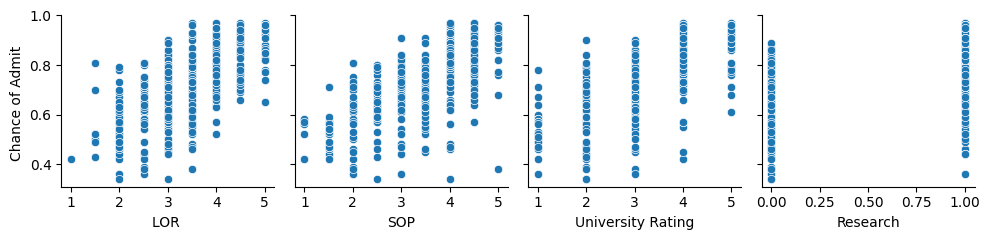

In [ ]:
sns.pairplot(df,x_vars=['LOR ','SOP','University Rating','Research'],
             y_vars='Chance of Admit ')
plt.tight_layout()

We can see LOR, SOP and University Ratings with scores 3-5 have almost equal chance of receiving admits.

Average requirements of all features to get admission for all universities on the basis of their Ratings are as  follows

In [ ]:
# Groupby the data by "University rating".
df.groupby("University Rating").mean()


,GRE,TOEFL,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [ ]:
print(f"Minimum requirements for more than 70% chance to get admission.\n {df[(df['Chance of Admit ']>0.70)].min()}")


Minimum requirements for more than 70% chance to get admission.
 GRE                  300.00
TOEFL                 98.00
University Rating      1.00
SOP                    1.50
LOR                    1.50
CGPA                   8.00
Research               0.00
Chance of Admit        0.71
dtype: float64


#**CGPA VS University Ratings**


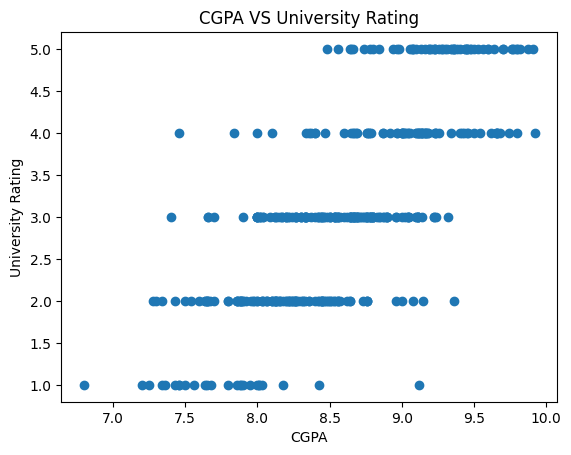

In [ ]:
plt.scatter(df["CGPA"],df["University Rating"])
plt.title("CGPA VS University Rating")
plt.xlabel("CGPA")
plt.ylabel("University Rating")
plt.show()

Better rated universities admit students with higher CCGPA, according to the above plot.

#**GRE vs TOEFL**

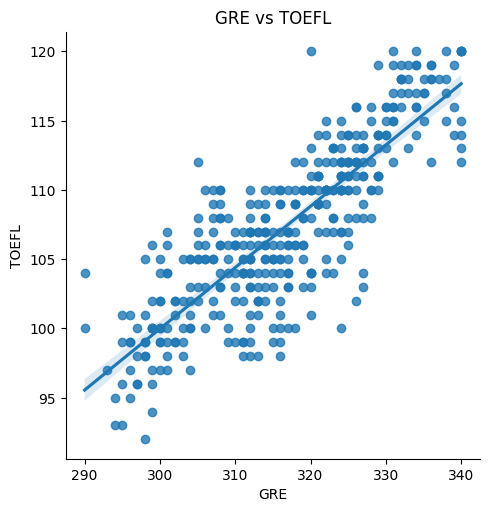

In [ ]:
fig = sns.lmplot(x="GRE", y="TOEFL", data=df)
plt.title("GRE vs TOEFL")
plt.show()


From above graph, both are highly correlated. Candidates scoring good GRE marks shows candidates also get higher TOEFL scores


#**GRE vs University Rating**


Text(0, 0.5, 'GRE')

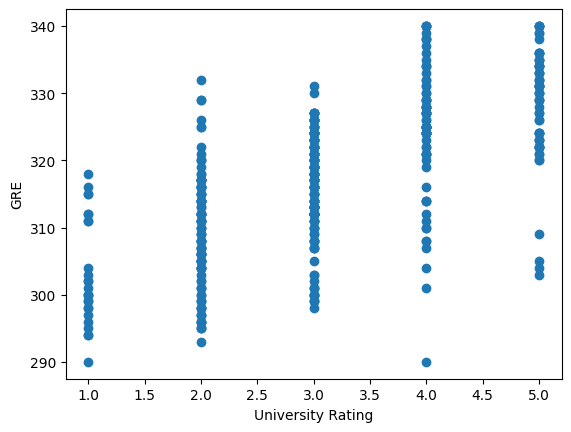

In [ ]:
plt.scatter(df['University Rating'], df['GRE'])
plt.xlabel('University Rating')
plt.ylabel('GRE')

From above graph it is evident, candidates with better GRE scores go to higher rated universities


#**LOR vs CGPA vs Research**


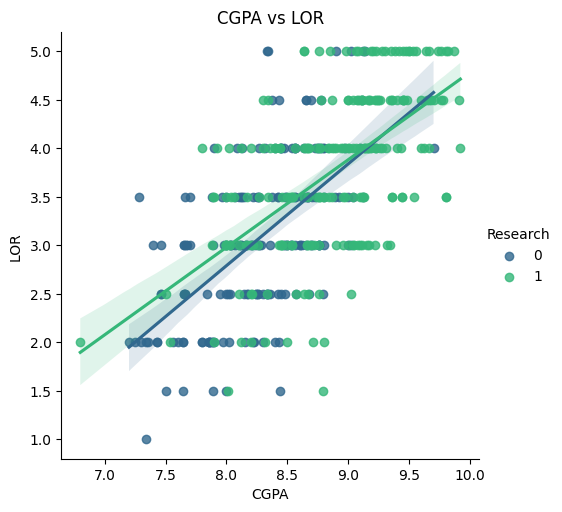

In [ ]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, palette='viridis', hue="Research")
plt.title("CGPA vs LOR")
plt.show()

From above graph, LOR and CGPA are not very correlated.A person's LOR is not dependent on that persons academic excellence. Having research experience is usually related with good LOR and academic experience is not necessarily an indicator in this. Supervisors have personal interaction with the students performing research which usually results in good LOR


#**CGPA vs SOP vs Research**


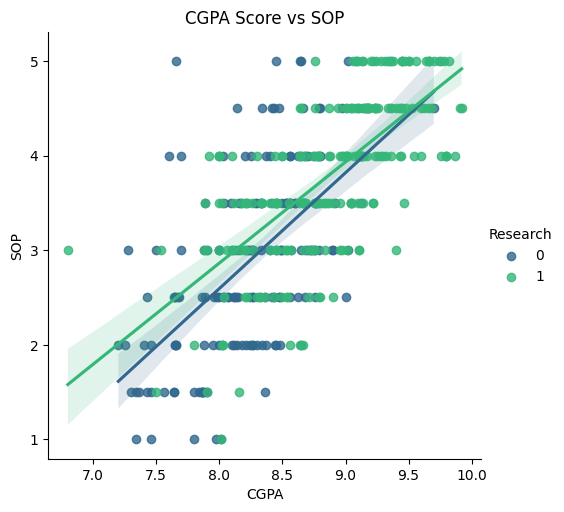

In [ ]:
fig = sns.lmplot(x="CGPA", y="SOP", data=df, palette='viridis',  hue="Research")
plt.title("CGPA Score vs SOP")
plt.show()

From the above graph, CGPA and SOP are not that related. But students with research experience have varied experiences to state in their SOP which explains the slight move towards good SOPs.



#**CGPA vs Chance of Admit vs Research**


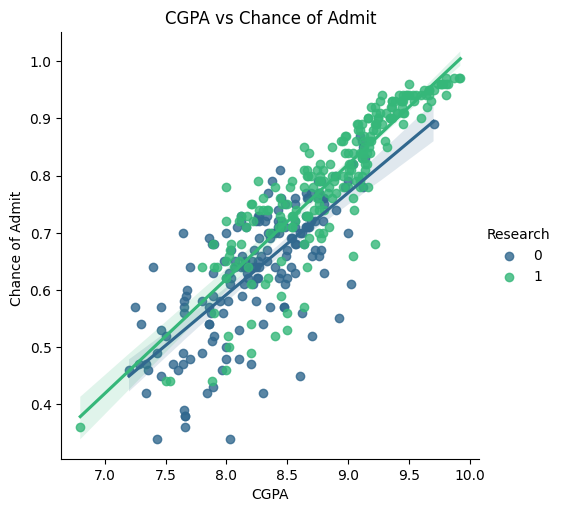

In [ ]:
fig = sns.lmplot(x="CGPA", y="Chance of Admit ", palette='viridis', data=df,hue="Research")
plt.title("CGPA vs Chance of Admit")
plt.show()

From above graph, it is clear that candidates with good CGPA without research experience have also 80% of chance of admit, but this chance boosts to more than 80% for candidates with good CGPA and having research experience. Thus, research experience is recommended for securing an admit.


## **Building Predictive Model**

After analysing the dataset, we will implement statistical models and machine learning (through scikit learn) to predict future applicant's chances of admission.

Prepare the data first, by splitting it into training and testing data.
We'll also scale our data, from 0 to 1, to receive more accurate predictions.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
targets = df['Chance of Admit ']
features = df.drop(columns = {'Chance of Admit '})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


As we have to decide if an applicant will be admitted or not, the output is a case of being either 0 or 1. Thus, this is a classification case. 
Using different models and checking the accuracy to appoint the best one. The models we have used in our dataset are:

1. Logistic Regression
2. Decision Tree Classification
3. Random Forest Classification

Classifying the chance of a student's admission as a binary value, accepted and not accepted.

Assume that if the student's chance is above the mean , they are accepted. If not, they will not be accepted.

Thus, finding the mean chance of admission and transforming the 'Chance to Admit' column to binary values

#**I. Logistic Regression**

In [ ]:
mean_chance = df['Chance of Admit '].mean()
mean_chance

0.7243499999999996

In [ ]:
y_train_binary = (y_train > 0.724).astype(int)
y_test_binary = (y_test > 0.724).astype(int)

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train_binary)
y_predict = LR_model.predict(X_test)
Training_model_score = (LR_model.score(X_train, y_train_binary))*100
print("Training Score",Training_model_score)
LR_model_score = (LR_model.score(X_test, y_test_binary))*100
print("Validation Score",LR_model_score)

Training Score 85.0
Validation Score 88.75


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


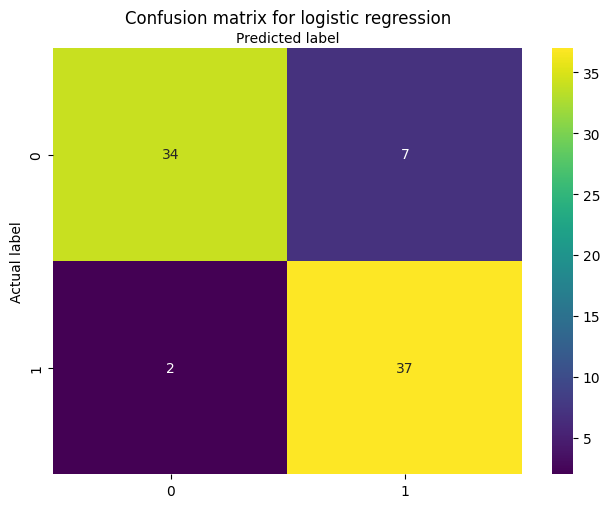

Precision score  for Logistic regression 0.841
Recall score for Logistic regression 0.949
f1 score for Logistic regression 0.892


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

confusion_matrix = confusion_matrix(y_test_binary,y_predict)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'viridis', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

precision_score_LR = precision_score(y_test_binary,y_predict)
print("Precision score  for Logistic regression %.3f" %precision_score_LR)
recall_score_LR= recall_score(y_test_binary,y_predict)
print("Recall score for Logistic regression %.3f" %recall_score_LR)
f1_score_LR=f1_score(y_test_binary,y_predict)
print("f1 score for Logistic regression %.3f" %f1_score_LR)

#**II. Decision Tree**

In [ ]:
dec_tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=16)
dec_tree_model.fit(X_train, y_train_binary)
y_predict = dec_tree_model.predict(X_test)
Training_dec_model_score = (dec_tree_model.score(X_train, y_train_binary))*100
print("Training model score for Decision Tree",Training_dec_model_score)
dec_tree_model_score = (dec_tree_model.score(X_test, y_test_binary))*100
print("Validation model score for Decision Tree",dec_tree_model_score)

Training model score for Decision Tree 100.0
Validation model score for Decision Tree 85.0


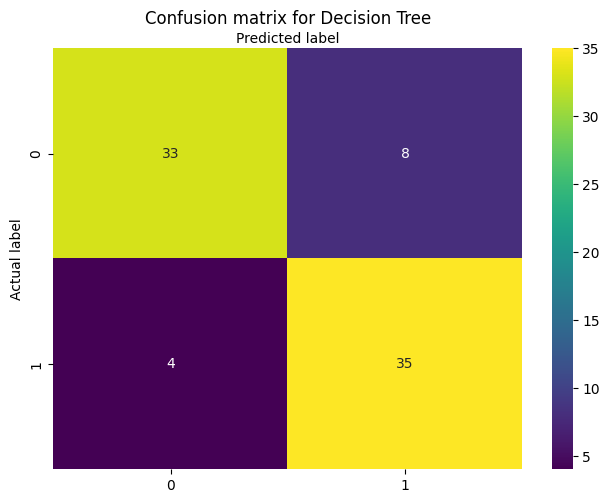

Precision score  for Logistic regression 0.814
Recall score for Logistic regression 0.897
f1 score for Logistic regression 0.854


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

confusion_matrix = confusion_matrix(y_test_binary,y_predict)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'viridis', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

precision_score_dec_tree = precision_score(y_test_binary,y_predict)
print("Precision score  for Logistic regression %.3f" %precision_score_dec_tree)
recall_score_dec_tree= recall_score(y_test_binary,y_predict)
print("Recall score for Logistic regression %.3f" %recall_score_dec_tree)
f1_score_dec_tree=f1_score(y_test_binary,y_predict)
print("f1 score for Logistic regression %.3f" %f1_score_dec_tree)

#**III. Random Forest Classifier**

In [ ]:
RF_model = RandomForestClassifier(n_estimators=50,max_depth=6,random_state=0)
RF_model.fit(X_train, y_train_binary)
y_predict = RF_model.predict(X_test)
Training_RF_model_score = (RF_model.score(X_train, y_train_binary))*100
print("Training model score for Random Forest",Training_RF_model_score)
RF_model_score = (RF_model.score(X_test, y_test_binary))*100
print("Validation model score for Random Forest",RF_model_score)

Training model score for Random Forest 93.75
Validation model score for Random Forest 96.25


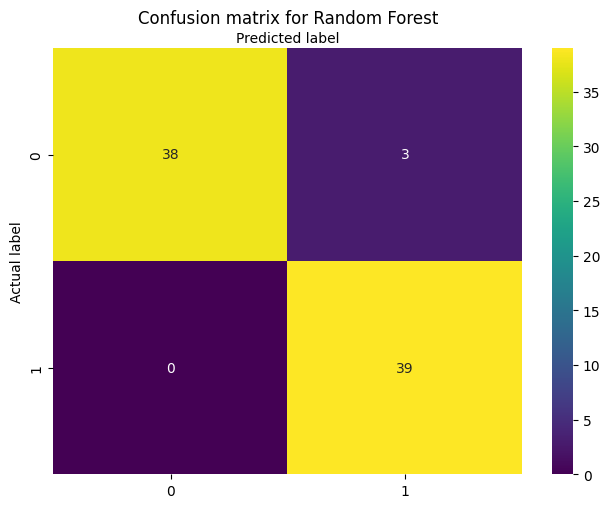

Precision score  for Logistic regression 0.929
Recall score for Logistic regression 1.000
f1 score for Logistic regression 0.963


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

confusion_matrix = confusion_matrix(y_test_binary,y_predict)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'viridis', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

precision_score_RF_model = precision_score(y_test_binary,y_predict)
print("Precision score  for Logistic regression %.3f" %precision_score_RF_model)
recall_score_RF_model= recall_score(y_test_binary,y_predict)
print("Recall score for Logistic regression %.3f" %recall_score_RF_model)
f1_score_RF_model=f1_score(y_test_binary,y_predict)
print("f1 score for Logistic regression %.3f" %f1_score_RF_model)

#Selecting best algorithm
Comparing scores,
>Logistic Regression = 88.75%

>Decision Tree = 85.0%

>Random Forest Classifier = 96.25% 


As Random Forests followed by Logistic Regression are the most accurate methods, they can be used to predict the future applicant's chances of admission.



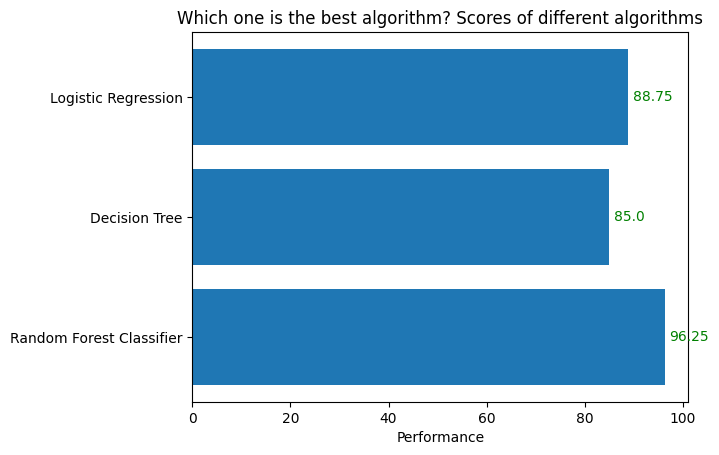

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'Decision Tree', 'Random Forest Classifier')
y_pos = np.arange(len(algorithms))
x = (LR_model_score, dec_tree_model_score, RF_model_score) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm? Scores of different algorithms')
for i, v in enumerate(x):
  ax.text(v + 1, i, str(v), color='green', va='center', fontweight='normal')
plt.show()

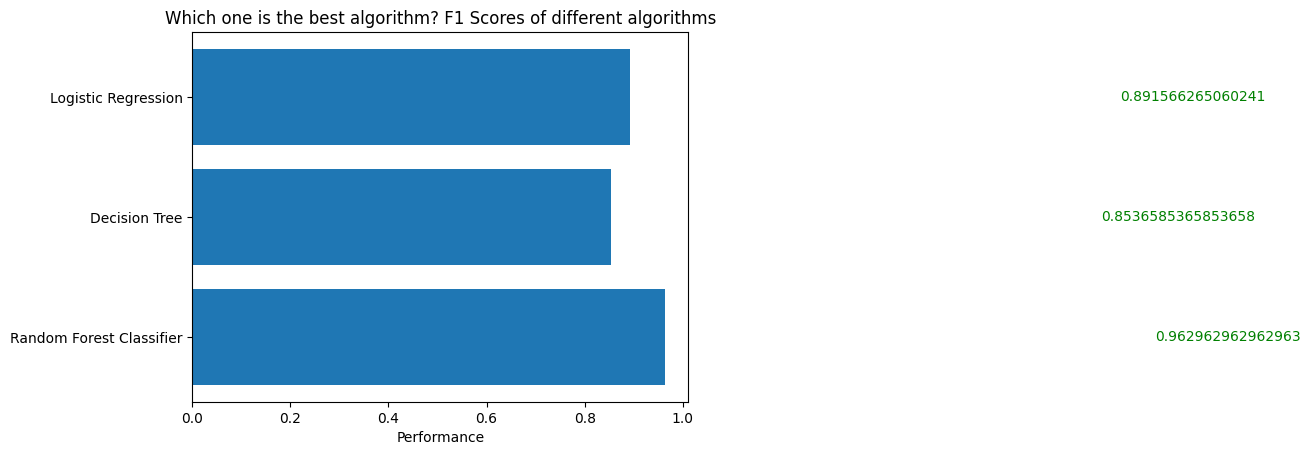

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'Decision Tree', 'Random Forest Classifier')
y_pos = np.arange(len(algorithms))
x = (f1_score_LR, f1_score_dec_tree, f1_score_RF_model) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm? F1 Scores of different algorithms')
for i, v in enumerate(x):
  ax.text(v + 1, i, str(v), color='green', va='center', fontweight='normal')
plt.show()